In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
x_data = np.loadtxt('../data/env1/x.csv', delimiter=',',encoding="utf-8-sig")
y_data = np.loadtxt('../data/env1/y.csv', delimiter=',',encoding="utf-8-sig")
theta_data = np.loadtxt('../data/env1/theta.csv', delimiter=',',encoding="utf-8-sig")
phi_data = np.loadtxt('../data/env1/phi.csv', delimiter=',',encoding="utf-8-sig")
v_data = np.loadtxt('../data/env1/v.csv', delimiter=',',encoding="utf-8-sig")
evaluation = np.loadtxt('../data/env1/evaluation.csv', delimiter=',',encoding="utf-8-sig")

In [4]:
df_x = pd.DataFrame(x_data)
df_y = pd.DataFrame(y_data)
df_theta = pd.DataFrame(theta_data)
df_phi = pd.DataFrame(phi_data)
df_v = pd.DataFrame(v_data)
df_evaluation = pd.DataFrame(evaluation)

In [5]:
df_theta.iloc[3]

0    -1.534891
1    -1.534891
2    -0.765091
3    -0.023253
4     0.479717
5     0.658117
6     0.745220
7     0.773515
8     0.747215
9     0.643199
10    0.098939
11   -0.321876
12   -0.457382
13   -0.540121
14   -0.587528
15   -0.606447
16   -0.597987
17   -0.559497
18   -0.481337
19   -0.375171
20   -0.302698
21   -0.239573
22   -0.181295
23   -0.123807
24   -0.063030
25    0.005033
26    0.086474
27    0.191434
28    0.346048
29    0.919013
Name: 3, dtype: float64

In [6]:
df_path_category = pd.DataFrame(columns=['initial_theta', 'terminal_theta', 'category'])

In [7]:
#pathを初期姿勢、終端姿勢に応じて分類する{'初期姿勢に関する分類番号''終端姿勢に関する分類番号'}
#-90 <=theta <  -45 ->1
#-45 <=theta <  0   ->2
#0   <theta  <= 45  ->3
#45  <theta  <= 90  ->4

for i in range(len(df_theta)):
    initial_theta = df_theta.iloc[i, 0]
    terminal_theta = df_theta.iloc[i, -1]
    
    if -np.pi/2 <= initial_theta < -np.pi/4:
        initial_theta_category_number = 1
    elif -np.pi/4 <= initial_theta < 0:
        initial_theta_category_number = 2
    elif 0 <= initial_theta < np.pi/4:
        initial_theta_category_number = 3
    elif np.pi/4 <= initial_theta < np.pi/2:
        initial_theta_category_number = 4
    else:
        print('Warning')
        
    if -np.pi/2 <= terminal_theta < -np.pi/4:
        terminal_theta_category_number = 1
    elif -np.pi/4 <= terminal_theta < 0:
        terminal_theta_category_number = 2
    elif 0 <= terminal_theta < np.pi/4:
        terminal_theta_category_number = 3
    elif np.pi/4 <= terminal_theta < np.pi/2:
        terminal_theta_category_number = 4
    else:
        print('Warning')
        
    path_category = 10 * initial_theta_category_number + terminal_theta_category_number
    
    pd_data = pd.DataFrame({'initial_theta':initial_theta_category_number, 'terminal_theta':terminal_theta_category_number, 'category':path_category},index=[i])
    df_path_category = pd.concat([df_path_category,pd_data])

In [8]:
df_path_category

,initial_theta,terminal_theta,category
0,3,3,33
1,1,2,12
2,3,4,34
3,1,4,14
4,2,4,24
...,...,...,...
10265,1,3,13
10266,3,2,32
10267,2,1,21
10268,1,3,13


In [9]:
#各カテゴリーに属するpathの総数
vc = df_path_category['category'].value_counts()
print(vc)

category
22    677
31    669
14    661
13    661
32    660
12    657
43    647
23    643
41    639
11    636
42    633
24    628
34    622
21    616
33    611
44    610
Name: count, dtype: int64


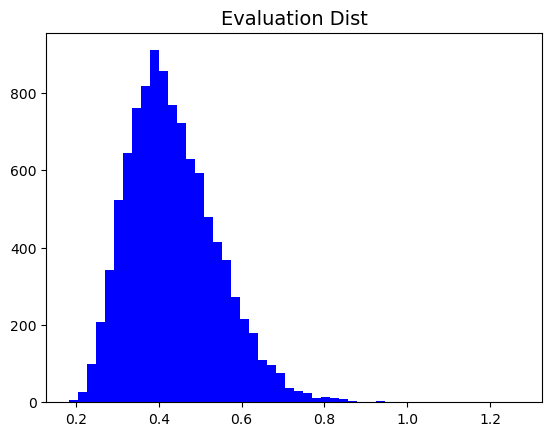

In [10]:
#path全体に対するevaluationの分布
plt.hist(df_evaluation[0] ,bins = 50, color = 'Blue')
plt.title('Evaluation Dist', fontsize=14)
plt.show()

In [11]:
#categoryとevaluationのdfを結合
df_category_and_eval = pd.concat([df_path_category, df_evaluation], axis=1)
df_category_and_eval = df_category_and_eval.rename(columns={0: 'evaluation'})
df_category_and_eval

,initial_theta,terminal_theta,category,evaluation
0,3,3,33,0.377023
1,1,2,12,0.525684
2,3,4,34,0.366827
3,1,4,14,0.633506
4,2,4,24,0.504845
...,...,...,...,...
10265,1,3,13,0.663673
10266,3,2,32,0.320695
10267,2,1,21,0.587907
10268,1,3,13,0.463487


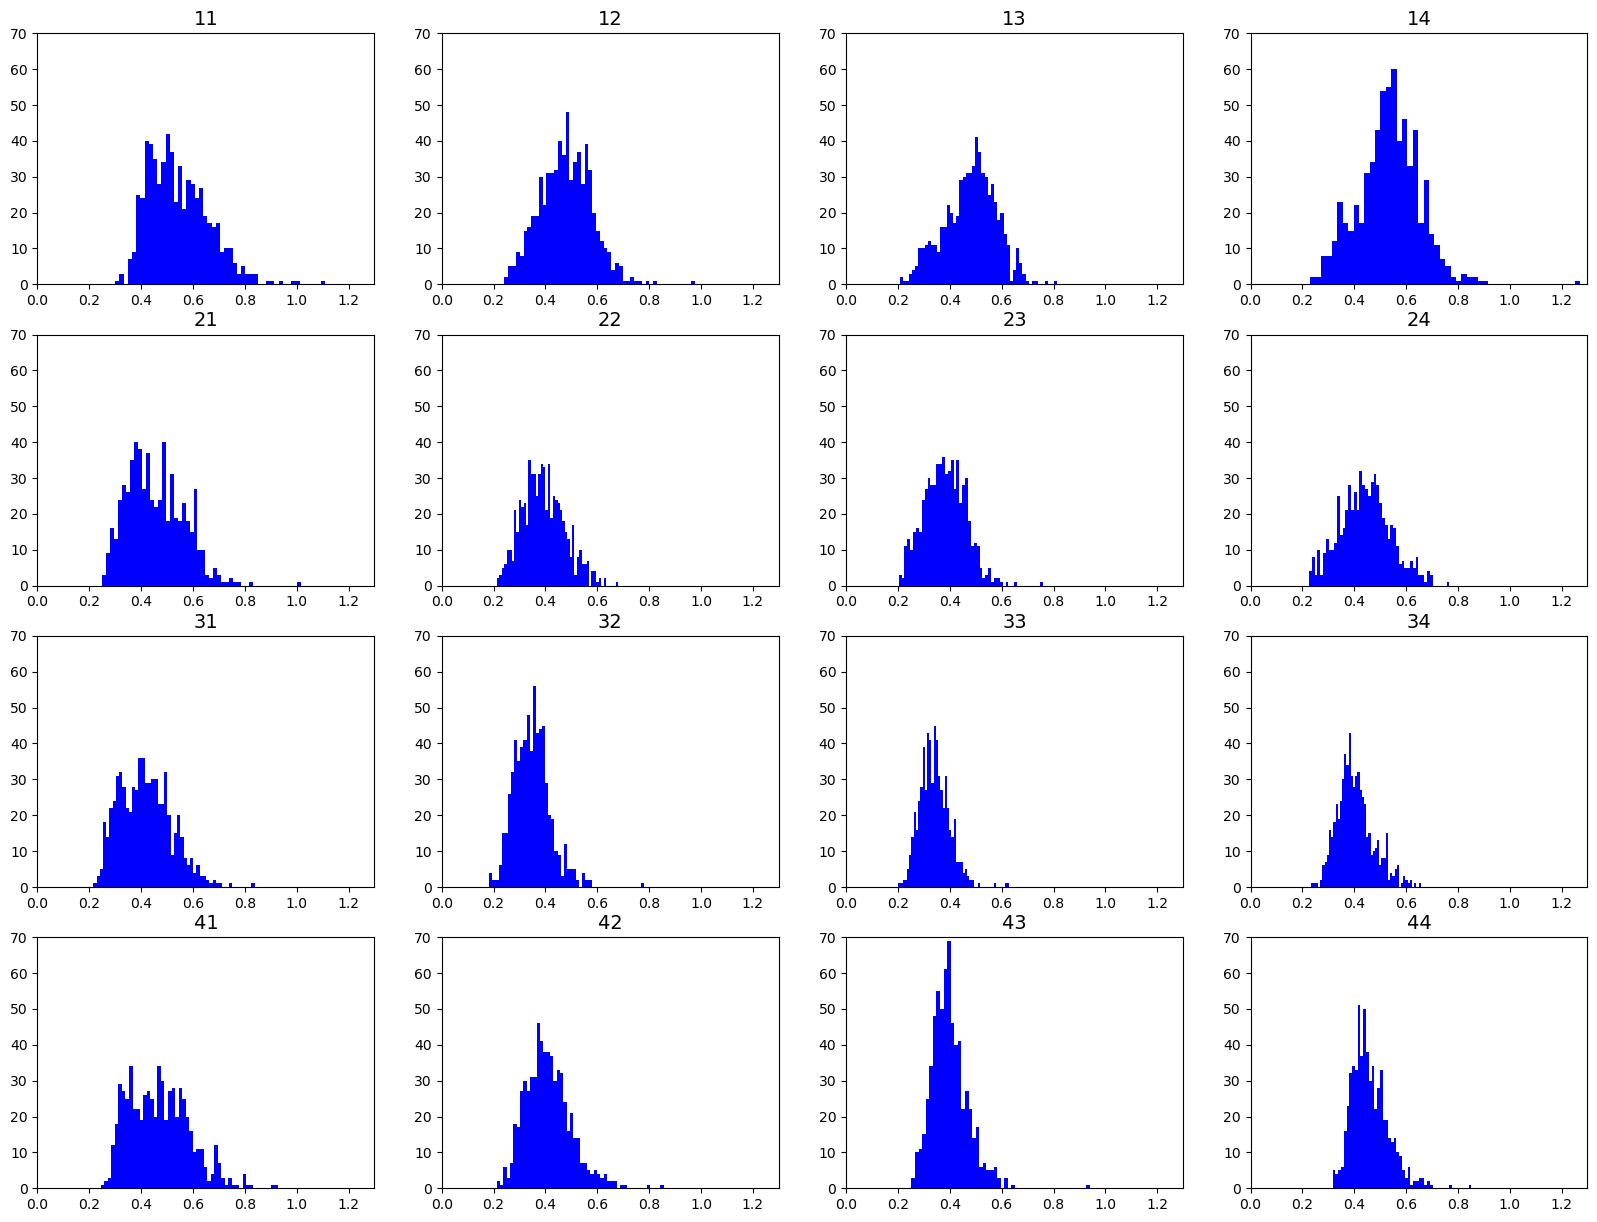

In [12]:
#categoryごとのevaluaitonの分布を表示する
fig, axes = plt.subplots(4, 4, figsize=(20,15))

for i in range(4):
    for j in range(4):
        category_num = 10*(i+1) + (j+1)
        axes[i, j].hist(df_category_and_eval[df_category_and_eval['category'] == category_num]['evaluation'] ,bins = 50, color = 'Blue')
        axes[i, j].set_xlim(0, 1.3)
        axes[i, j].set_ylim(0, 70)
        axes[i, j].set_title("{}".format(category_num), fontsize=14)

plt.show()

In [13]:
#各ヒストグラムの中央値より小さいデータのindexを抽出する
index_set = set()

for i in range(4):
    for j in range(4):
        category_num = 10*(i+1) + (j+1)
        median = df_category_and_eval[df_category_and_eval['category'] == category_num]['evaluation'].median()
        List = df_category_and_eval[df_category_and_eval['category'] == category_num].index[df_category_and_eval[df_category_and_eval['category'] == category_num]['evaluation'] <= median].tolist()
        Set = set(List)
        index_set = index_set | Set
    
print(len(index_set))

5140


In [14]:
len(x_data)

10270

In [15]:
index_bool = []
for i in range(len(x_data)):
    if i in index_set:
        index_bool.append(True)
    else:
        index_bool.append(False)
        
print(index_bool)
print(len(index_bool))

[False, False, True, False, False, True, False, True, True, False, True, False, True, True, False, True, False, True, True, False, True, False, True, False, True, False, True, False, True, True, False, False, True, False, True, False, False, True, False, False, True, False, True, True, True, False, False, True, True, True, False, True, False, False, False, False, True, False, False, False, False, False, False, True, True, False, False, True, True, False, True, True, False, False, True, True, True, True, True, True, True, True, True, True, False, True, True, False, True, True, True, True, False, False, True, True, True, True, False, True, True, False, True, False, False, False, False, True, True, False, False, True, False, True, True, False, True, False, False, True, True, True, False, False, False, True, True, False, True, True, True, True, True, True, False, False, False, True, False, True, False, False, False, True, True, False, True, False, True, False, True, False, False, True, Fal

In [16]:
#指定したindexのpathをcsvに保存
x_data_extract = x_data[index_bool]
y_data_extract = y_data[index_bool]
theta_data_extract = theta_data[index_bool]
phi_data_extract = phi_data[index_bool]
v_data_extract = v_data[index_bool]


np.savetxt('../data/env1/x_extract.csv', x_data_extract, delimiter=","  )
np.savetxt('../data/env1/y_extract.csv', y_data_extract, delimiter=","  )
np.savetxt('../data/env1/theta_extract.csv', theta_data_extract, delimiter=","  )
np.savetxt('../data/env1/phi_extract.csv', phi_data_extract, delimiter=","  )
np.savetxt('../data/env1/v_extract.csv', v_data_extract, delimiter=","  )
